# Neural Network with numpy

This code explains the implementation of the Neural Network. To use the functions, import the .py file.  

## Libraries

* NeuralNetwork : Main code that contains functionality of Neural Network.
* numpy         : Python math library.
* matplotlib    : Python library for plotting the results on 2D axes.
* mnist         : Mnist dataset.

In [9]:
import NeuralNetwork as nn
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

## Data
Defining training and test data for further use. mnist library is used for the task.  
For encoding labels as one hot vectors, OneHot() function from NeuralNetwork is used.

In [2]:
data = MNIST('./data')

X_train, y_train = data.load_training()
X_test, y_test = data.load_testing()
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = nn.OneHot(y_train)
y_test = nn.OneHot(y_test)

## Network Model

BuildModel() function from NeuralNetworks is a tool to create a neural network model.  
The structure of the input must be designed as follows:
* BuildModel() function takes a list as an input.
* This list must contain a layer in each item in the list
* Layer should countain 3 variables:
    - Activation function name : Currently available functions are "tanh", "relu" and "softmax". These functions are only callable by the names given.
    - Number of input layers.
    - Number of output layers.  
    
It's also important to mention that number of input layers (except first layer) should match number of output layers of the previous layer.

In [3]:
layers = nn.BuildModel([("tanh", 784, 64), ("relu", 64, 16), ("softmax", 16, 10)])

## Training the model

After the network model is built, training can be done by calling Train() function from NeuralNetworks.  
This function takes 3 inputs:
* Network Model
* Training Images
* Training Labels
* Number of epochs (default = 100).
* Batch size (default = 50). 
* Learning rate (default = 0.01).

In [4]:
validation_costs, training_scores = nn.Train(layers, X_train, y_train, num_epochs=100, batch_s=50, learning_rate=.01)

Training started, may take few minutes.
Training completed in 505.1108000278473 seconds.


## Testing the model

After training is done, test images can be fed to trained neural network. The predictions can be obtained by using Predict() function from NeuralNetworks. To calculate accuracy, NeuralNetworks provide a CalculateAccuracy() function.  
  
Predict() function takes 2 arguments:
* Test Data
* Network Model  

CalculateAccuracy() function also takes 2 arguments:
* Predictions made by Network
* Test Labels

In [5]:
prediction = nn.Predict(X_test, layers)
test_accuracy = nn.CalculateAccuracy(prediction, y_test)

Prediction complete!


## Plotting the Results

After training and predicting, the results can be plotted 

Training Accuracy = 99.05
Test Accuracy = 97.16


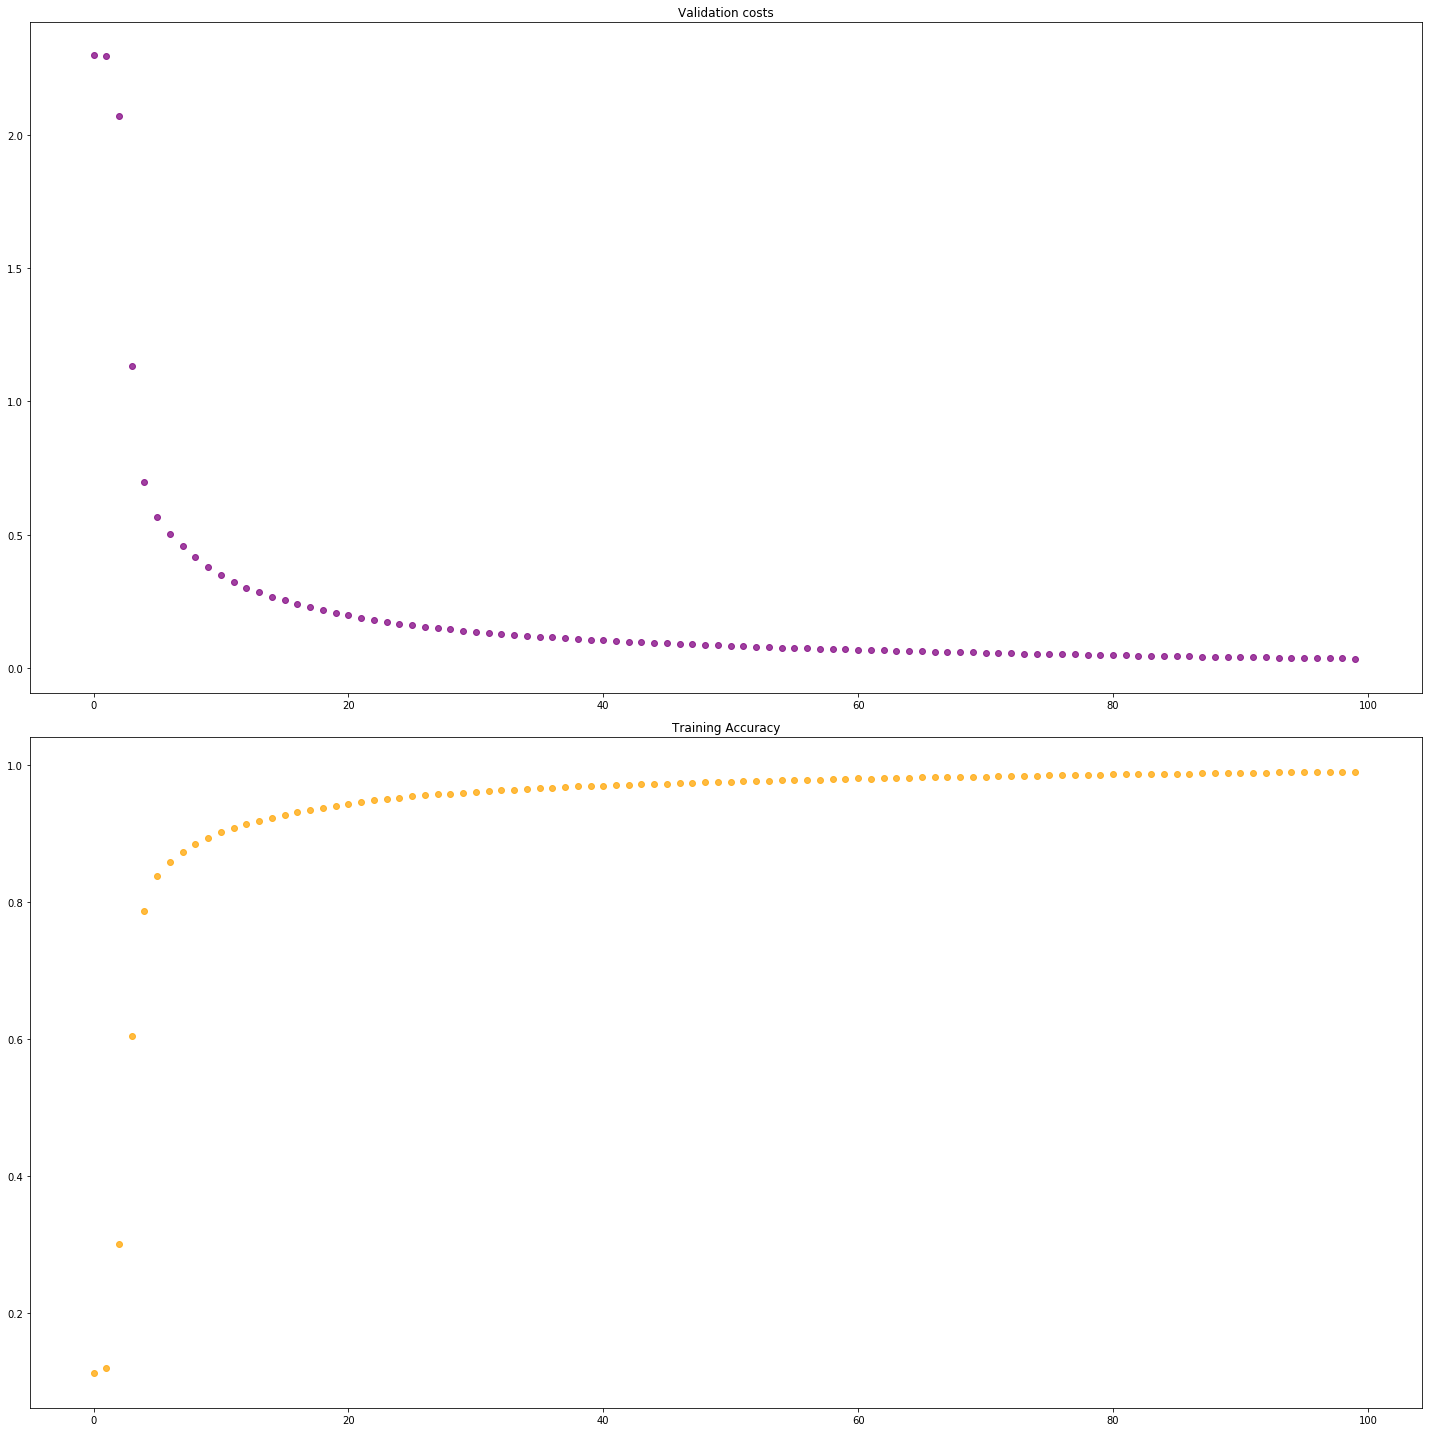

In [7]:
print("Training Accuracy = %s" % str(training_scores[-1] * 100))
print("Test Accuracy = %s" % str(test_accuracy * 100))
fig, axes = plt.subplots(2,1, figsize=(20,20))
axes[0].set_title("Validation costs")
axes[1].set_title("Training Accuracy")

for x, y in enumerate(validation_costs):
    axes[0].scatter(x, y, color='purple', alpha=0.75)
for x, y in enumerate(training_scores):
    axes[1].scatter(x, y, color='orange', alpha=0.75)

plt.tight_layout()
plt.show()